Evolutionary dynamics of organised crime and terrorist networks in an network explicit configuration
---

Louis Weyland

In [1]:
"""Importing all the modules."""
import os
import sys
from collections import defaultdict
from typing import Any, DefaultDict, List

import matplotlib.pyplot as plt
from fitter import Fitter, get_common_distributions
from IPython.display import IFrame

# Get directory first
path = os.getcwd()
par_dir = os.path.abspath(os.path.join(path, "../../"))
# Import own module
sys.path.append(par_dir)
if True:
    from network_utils.network_converter import NetworkConverter
    from network_utils.network_reader import NetworkReader
    from network_utils.network_stats import NetworkStats
    from simulators.meta_simulator import MetaSimulator
    from simulators.sim_mart_vaq import SimMartVaq
    from utils.plotter import Plotter

In [2]:
# Set plotter
plotter = Plotter()
plotter.args.draw_network = "n"

In [3]:
# IFrame("https://www.nature.com/articles/s41598-019-46141-8.pdf", width=1200, height=500)

### Overview of the data

In [4]:
# IFrame("https://arxiv.org/pdf/2003.05303.pdf", width=1000, height=500)

In [5]:
# Get stats about network_obj
network_name = "montagna_calls"
nx_network = NetworkReader().get_data(network_name)
nk_network = NetworkConverter.nx_to_nk(nx_network)
network_stats = NetworkStats(nk_network)
network_stats.get_overview()

----------------------------
Network Properties:
nodes, edges			95, 120
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026876
clustering coefficient		0.116725
min/max/avg degree		1, 25, 2.526316
degree assortativity		-0.074455
number of connected components	5
size of largest component	84 (88.42 %)
Communities detected in 0.14351 [s]
solution properties:
-------------------  ---------
# communities        10
min community size    2
max community size   21
avg. community size   9.5
modularity            0.631285
-------------------  ---------
Calculating best minimal value for power law fit


/home/louis/anaconda3/envs/criminal_env/lib/python3.8/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Graph must be connected! Otherwise distance == inf
                                                             

----------------------------


In [6]:
# Plot the network
gt_network = NetworkConverter.nx_to_gt(nx_network)
plotter.draw_network(gt_network)

Calculating best minimal value for power law fit
is_powerlaw=(False, 2.6963785729521623)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

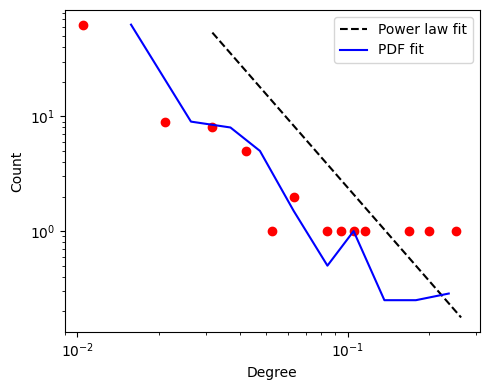

In [7]:
# Plot degree distribution
is_powerlaw = network_stats.check_if_powerlaw(network_stats.get_degree_distribution())
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Building around the data by using preferential attachment

In [8]:
# Adding nodes based on preferential attachment
meta_sim = MetaSimulator(
    network_name=network_name, ratio_honest=0.8, ratio_wolf=0.1, n_new_edges=2
)
simulators = SimMartVaq(network=meta_sim.network)
plotter.draw_network(network=simulators.network, color_vertex_property="state_color")

In [9]:
# Get overview of the new network
complete_network_stats = NetworkStats(NetworkConverter.gt_to_nk(simulators.network))
complete_network_stats.get_overview()

----------------------------
Network Properties:
nodes, edges			950, 3646
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.008088
clustering coefficient		0.021979
min/max/avg degree		2, 192, 7.675789
degree assortativity		0.193818
number of connected components	1
size of largest component	950 (100.00 %)


/home/louis/anaconda3/envs/criminal_env/lib/python3.8/site-packages/powerlaw.py:1615: RuntimeWarning: invalid value encountered in true_divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Communities detected in 0.19283 [s]
solution properties:
-------------------  ----------
# communities         16
min community size    30
max community size   113
avg. community size   59.375
modularity             0.536363
-------------------  ----------
Calculating best minimal value for power law fit


----------------------------


Calculating best minimal value for power law fit
is_powerlaw=(False, 3.201156116538111)
Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


<AxesSubplot:xlabel='Degree', ylabel='Count'>

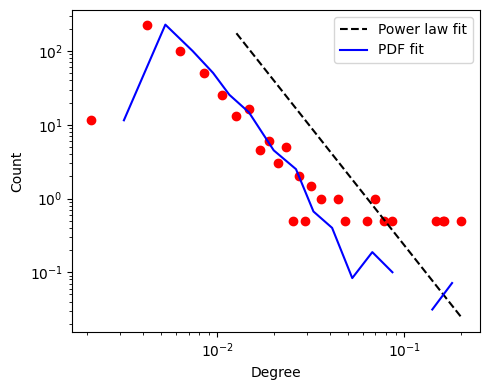

In [10]:
# Plot degree distribution
is_powerlaw = complete_network_stats.check_if_powerlaw(
    complete_network_stats.get_degree_distribution()
)
print(f"{is_powerlaw=}")
plotter.plot_log_log(
    complete_network_stats.get_degree_distribution(), x_label="Degree", y_label="Count"
)

### Dividing the network into groups

In [11]:
# Dividing network into groups
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.8,
    ratio_wolf=0.1,
    n_new_edges=2,
    random_fit_init=True,
)
simulators = SimMartVaq(network=meta_sim.network)

group_dict = simulators.select_multiple_communities(
    simulators.network, radius=2, min_grp=5, max_grp=6
)
color_code = simulators.network.new_vertex_property("int")
simulators.network.vertex_properties["group_color"] = color_code
for k, v in group_dict.items():
    for mbr in v:
        simulators.network.vp.group_color[simulators.network.vertex(mbr)] = k
plotter.draw_network(simulators.network, color_vertex_property="group_color")

,sumsquare_error,aic,bic,kl_div
gamma,0.000056,1539.954117,-12250.842103,inf
chi2,0.000056,1539.954112,-12250.842018,inf
cauchy,0.000081,1593.195113,-11984.118972,inf
rayleigh,0.000083,1626.329684,-11961.444385,inf
norm,0.000105,1689.653098,-11790.984853,inf


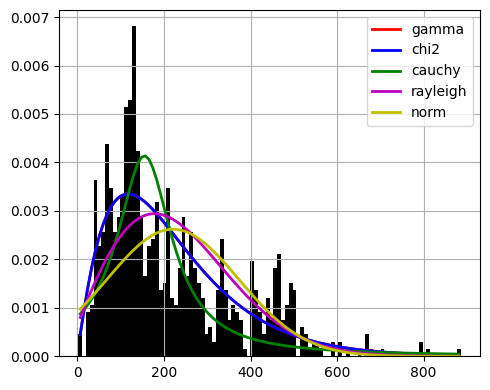

In [12]:
# Get distribution of the groups

group_size_data_collector = defaultdict(list)  # type: DefaultDict[str, List[Any]]
group_size_data_collector["group_size"]
for i in range(0, 100):
    group_dict = simulators.select_multiple_communities(
        simulators.network, radius=3, min_grp=5, max_grp=10
    )
    for k, v in group_dict.items():
        group_size_data_collector["group_size"].append(len(v))
plotter.plot_hist(
    dict_data=group_size_data_collector,
    data_to_plot=["group_size"],
    xlabel="Group Size",
    ylabel="Count",
    title="Group size distribution",
    n_bins=150,
)
f = Fitter(
    group_size_data_collector["group_size"], distributions=get_common_distributions()
)
f.fit()
f.summary()

### Run simulation

In [13]:
SimMartVaq.__init__?

Signature:
SimMartVaq.__init__(
    self,
    network: graph_tool.Graph,
    delta: float = 0.0,
    tau: float = 0.0,
    gamma: float = 0.5,
    beta_s: int = 0,
    beta_h: int = 10,
    beta_c: int = 400,
    c_w: int = 1,
    c_c: int = 1,
    r_w: int = 1,
    r_c: int = 1,
    r_h: int = 0,
    temperature: float = 10,
    mutation_prob: float = 0.3,
) -> None
Docstring:
Init the network characteristics.

Args:
    network (gt.Graph): Initial criminal network
    delta (int, optional): Influence of criminals on the acting of the wolf. Defaults to 0.
    tau (int, optional):Influence of the wolf's action on criminals. Defaults to 0.
    gamma (float, optional): Punishment ratio for the other members of the criminal
                                                            organization. Defaults to 0.5.
    beta_s (int, optional): State punishment value. Defaults to 0.
    beta_h (int, optional): Civil punishment value. Defaults to 10.
    beta_c (int, optional): Criminal punish

In [23]:
# Run simulation 2
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.9,
    ratio_wolf=0.01,
    n_new_edges=2,
    random_fit_init=True,
)
simulators = SimMartVaq(
    network=meta_sim.network,
    delta=0.1,  # no acting for wolfs
    gamma=0.1,
    tau=0.7,  # no fintess sharing between wolf to criminal
    beta_s=10,
    beta_h=5,
    beta_c=25,
    c_c=1,  # no benefits from criminals/ they still act
    r_c=10,
    c_w=1,
    r_w=0.2,
    r_h=0,
    mutation_prob=0.01,  # only fermi function
)
data_collector = simulators.avg_play(
    network=simulators.network, rounds=20000, n_groups=1, repetition=1
)

Playing the rounds...:   0%|          | 0/20000 [00:00<?, ?it/s]

Repeating simulation....:   0%|          | 0/1 [00:00<?, ?it/s]

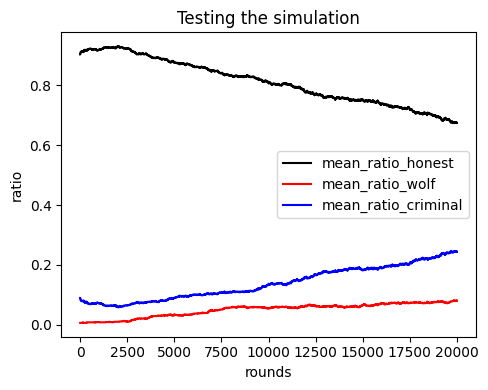

In [24]:
# Show the data
ax_0 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["mean_ratio_honest", "mean_ratio_wolf", "mean_ratio_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
    plot_std="True",
)

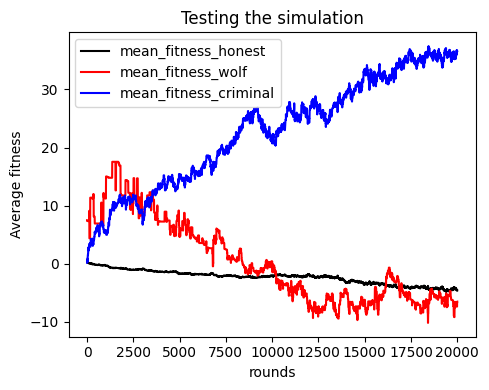

mean_fitness_dict['h']=-0.09578327015762392
mean_fitness_dict['c']=9.174653914174304
mean_fitness_dict['w']=-0.061907619433380134


In [25]:
ax_1 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["mean_fitness_honest", "mean_fitness_wolf", "mean_fitness_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
    plot_std="True",
)
plt.show()

mean_fitness_dict = simulators.get_analytical_solution(radius=3)
print(f"{mean_fitness_dict['h']=}")
print(f"{mean_fitness_dict['c']=}")
print(f"{mean_fitness_dict['w']=}")

In [17]:
# Run simulation 2
meta_sim = MetaSimulator(
    network_name=network_name,
    ratio_honest=0.9,
    ratio_wolf=0.01,
    n_new_edges=2,
    random_fit_init=True,
)
simulators = SimMartVaq(
    network=meta_sim.network,
    delta=0.3,  # no acting for wolfs
    gamma=1,
    tau=0.7,  # no fintess sharing between wolf to criminal
    beta_s=65,
    beta_h=30,
    beta_c=1000,
    c_c=100,  # no benefits from criminals/ they still act
    r_c=1,
    c_w=0,
    r_w=1,
    mutation_prob=0.1,  # only fermi function
)
data_collector = simulators.avg_play(
    network=simulators.network, rounds=500, repetition=1
)

Playing the rounds...:   0%|          | 0/500 [00:00<?, ?it/s]

Repeating simulation....:   0%|          | 0/1 [00:00<?, ?it/s]

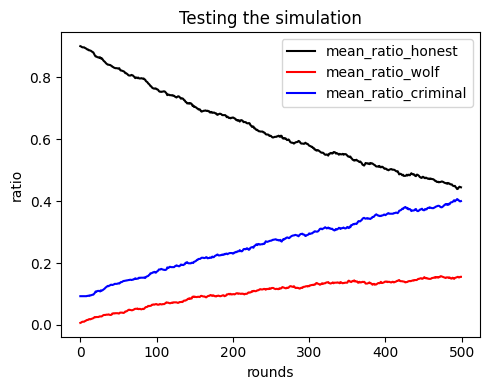

In [18]:
# Show the data
ax_0 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["mean_ratio_honest", "mean_ratio_wolf", "mean_ratio_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="ratio",
    plot_std="True",
)

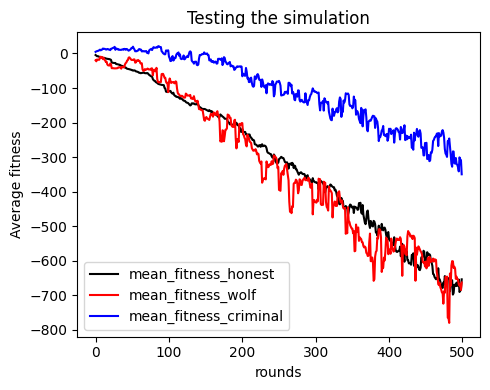

mean_fitness_dict['h']=-8.978616260399942
mean_fitness_dict['c']=89.91992481661494
mean_fitness_dict['w']=-17.87525457101018


In [19]:
ax_1 = plotter.plot_lines(
    dict_data=data_collector,
    data_to_plot=["mean_fitness_honest", "mean_fitness_wolf", "mean_fitness_criminal"],
    title="Testing the simulation",
    xlabel="rounds",
    ylabel="Average fitness",
    plot_std="True",
)
plt.show()

mean_fitness_dict = simulators.get_analytical_solution(radius=3)
print(f"{mean_fitness_dict['h']=}")
print(f"{mean_fitness_dict['c']=}")
print(f"{mean_fitness_dict['w']=}")